https://www.dataquest.io/blog/basic-statistics-in-python-probability/

In [2]:
import csv
with open('winemag-data-130k-v2.csv', 'r', encoding='latin-1') as f:
    wines = list(csv.reader(f))

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Extract the Tokaji scores
tokaji = []
non_tokaji = []
for wine in wines[1:]:
    points = wine[4]
    if points != '':
        if wine[9] == 'Tokaji':
            tokaji.append(float(points))
        else:
            non_tokaji.append(float(points))
            
# Extract the Lamb
lambrusco, non_lambrusco = [], []
for wine in wines[1:]:
    points = wine[4]
    if points != '':
        if wine[9] == 'Lambrusco':
            lambrusco.append(float(points))
        else:
            non_lambrusco.append(float(points))

In [21]:
wines = pd.read_csv('winemag-data-130k-v2.csv')

In [23]:
wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [33]:
wines_points_variety = wines[['points', 'variety']].copy()
wines_points_variety.head()

,points,variety
0,87,White Blend
1,87,Portuguese Red
2,87,Pinot Gris
3,87,Riesling
4,87,Pinot Noir


In [37]:
tokaji = wines_points_variety.loc[wines_points_variety.variety == 'Tokaji', 'points']
non_tokaji = wines_points_variety.loc[~(wines_points_variety.variety == 'Tokaji'), 'points']

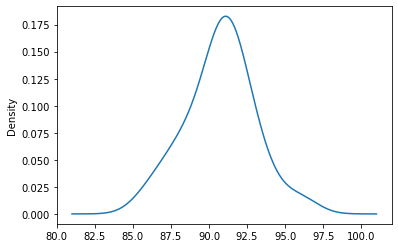

In [40]:
tokaji.plot.kde()

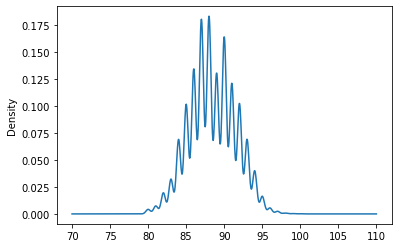

In [41]:
non_tokaji.plot.kde()

In [42]:
tokaji.mean()

90.75

In [50]:
tokaji.std()

2.231201664925252

In [46]:
lambrusco = wines_points_variety.loc[wines_points_variety.variety == 'Lambrusco', 'points']

In [47]:
lambrusco_avg = lambrusco.mean()
lambrusco_avg

84.72

In [49]:
lambrusco_std = lambrusco.std()
lambrusco_std

1.9170555653961425

In [51]:
tokaji_mean = tokaji.mean()

In [52]:
tokaji.std = tokaji.std()

In [53]:
z = (tokaji_mean - lambrusco_avg) / lambrusco_std
z

3.145448733382934